In [1403]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats

warnings.filterwarnings('ignore')

In [1404]:
df = pd.read_csv('/Users/sarahrestrepo/Desktop/healthcare-dataset-stroke-data.csv')

In [1405]:
df.shape

(5110, 12)

In [1406]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [1407]:
#Drop unneeded columns and standardize columns
#Drop potential duplicates, reset index
#Converting "age" column from float to integer
#Dealing with nulls
def cleaning_df_transforms(df):
    df.drop(['id'], axis=1, inplace=True)
    df.columns = df.columns =df.columns.str.lower()
    df['age'] = df['age'].astype(int)
    df.drop_duplicates().reset_index(drop=True)
    for col_name in df.columns:
        nulls = df[col_name].isna().sum()
        if nulls > 0 :
            if df[col_name].dtypes =='O':
                df[col_name] = df[col_name].fillna(df[col_name].mode().values[0])
            else:
                df[col_name] = df[col_name].fillna( np.mean(df[col_name]))
    return df

In [1408]:
df_clean = cleaning_df_transforms(df)
df_clean = pd.DataFrame(df)

In [1409]:
df_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [1410]:
df_clean.shape

(5110, 11)

In [1411]:
df_clean[df_clean['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [1412]:
#Index_to_remove = 3116; in gender column it is the only value = "other"
df_clean.drop(3116, inplace=True)
df_clean.reset_index(drop=True, inplace=True)

In [1413]:
df_clean.shape

(5109, 11)

In [1414]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   int64  
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.2+ KB


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276273,0.263649,0.238212,0.326186,0.245109
hypertension,0.276273,1.000000,0.108292,0.174540,0.160147,0.127891
heart_disease,0.263649,0.108292,1.000000,0.161907,0.038862,0.134905
avg_glucose_level,0.238212,0.174540,0.161907,1.000000,0.168910,0.131991
bmi,0.326186,0.160147,0.038862,0.168910,1.000000,0.038912
stroke,0.245109,0.127891,0.134905,0.131991,0.038912,1.000000


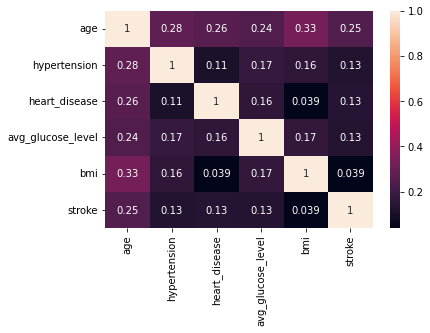

In [1415]:
#Before I change stroke data type I'd like to check the corralation with the numerical columns
numericals = df_clean.select_dtypes(np.number)
sns.heatmap(numericals.corr(), annot=True)
numericals.corr()

In [1416]:
#Correctly converting columns into appropriate classification
df_clean['heart_disease'] = df_clean['heart_disease'].astype('object')
df_clean['hypertension'] = df_clean['hypertension'].astype('object')
df_clean['stroke'] = df_clean['stroke'].astype('object')

In [1417]:
for col in df_clean.select_dtypes(object).columns:
    print(df_clean[col].value_counts(),'\n')

Female    2994
Male      2115
Name: gender, dtype: int64 

0    4611
1     498
Name: hypertension, dtype: int64 

0    4833
1     276
Name: heart_disease, dtype: int64 

Yes    3353
No     1756
Name: ever_married, dtype: int64 

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64 

Urban    2596
Rural    2513
Name: residence_type, dtype: int64 

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64 

0    4860
1     249
Name: stroke, dtype: int64 



In [1418]:
# Stroke is imbalanced with "Never had a stroke" = 4,860 and "Had a stroke" = 249. 
# I will combine children and never_worked to clean the column work_type
# I will also relabel the binary classification in hypertension, heart_disease and stroke to a "yes" and "no" statement


In [1419]:
def relabel_work_type(x):
    if x == 'children' or x == 'Never_worked':
        return 'Never_worked'
    
    else:
        return str(x)
    
df_clean['work_type'] = list(map(relabel_work_type, df_clean['work_type']))

In [1420]:
df_clean['work_type'].value_counts()

Private          2924
Self-employed     819
Never_worked      709
Govt_job          657
Name: work_type, dtype: int64

In [1421]:
def relabel_yes_no(x):
    if x == 0:
        return 'No'
    else:
        return 'Yes'
    
df_clean['hypertension'] = list(map(relabel_yes_no, df_clean['hypertension']))
df_clean['heart_disease'] = list(map(relabel_yes_no, df_clean['heart_disease']))
df_clean['stroke'] = list(map(relabel_yes_no, df_clean['stroke']))

In [1422]:
df_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,Yes
1,Female,61,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Yes
2,Male,80,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,Yes
3,Female,49,No,No,Yes,Private,Urban,171.23,34.400000,smokes,Yes
4,Female,79,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Yes


In [1423]:
##I will now begin cleaning the numerical columns##

#Avg age is 43 with a minimum of 0 years old and max of 82
#Avg glucose level is 106 with a minimum of 55 and max of 271
#Avg BMI is 29 with a minimum of 10 and a max of 98
df_clean.describe()

,age,avg_glucose_level,bmi
count,5109.000000,5109.000000,5109.000000
mean,43.218634,106.140399,28.894508
std,22.634799,45.285004,7.698235
min,0.000000,55.120000,10.300000
25%,25.000000,77.240000,23.800000
50%,45.000000,91.880000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


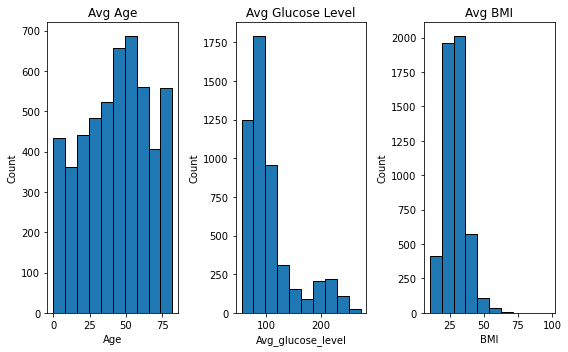

In [1424]:
# From the figures below:
# Age is left skewed with a mean of 43 but a median of 45
# Avg glucose level is right skewed with a mean of 106 but a median of 92 
# BMI is right skewed with a mean of 29 and a median of 28 .

plt.figure(figsize=(8, 5))
plt.subplot(131)  
plt.hist(df_clean["age"], edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Avg Age')

plt.subplot(132) 
plt.hist(df_clean["avg_glucose_level"], edgecolor='black')
plt.xlabel('Avg_glucose_level')
plt.ylabel('Count')
plt.title('Avg Glucose Level')

plt.subplot(133)
plt.hist(df_clean["bmi"],edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Avg BMI')

plt.tight_layout()
plt.show()

In [1425]:
#Getting a better look at the target column.
# 4,861 instances of 'No stroke' and 249 instances of 'Stroke'
#Data is imbalanced
y = df_clean['stroke']
print (f'Number of patients had a stroke: {y.value_counts()[1]}\nNumber of patients did not have a stroke:{y.value_counts()[0]}')

Number of patients had a stroke: 249
Number of patients did not have a stroke:4860


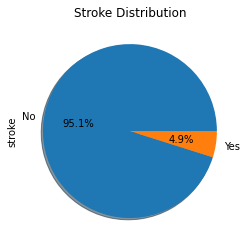

In [1426]:
df_clean.stroke.value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Stroke Distribution')
plt.show()

age


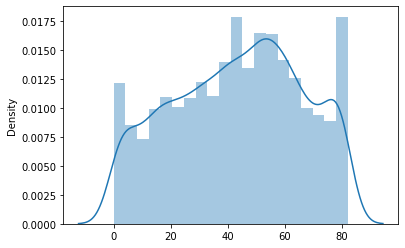

avg_glucose_level


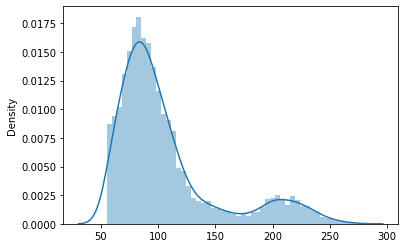

bmi


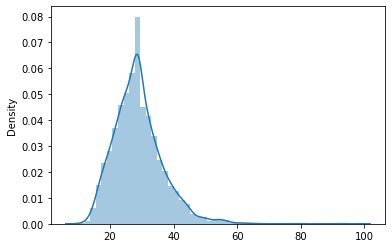

age


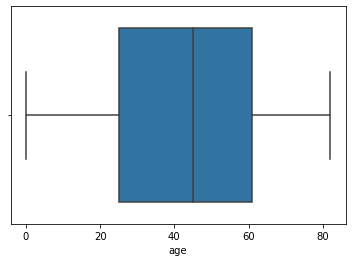

avg_glucose_level


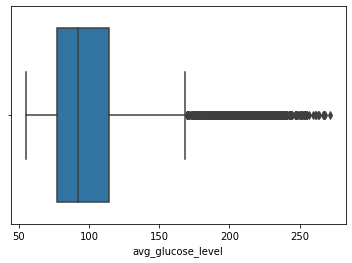

bmi


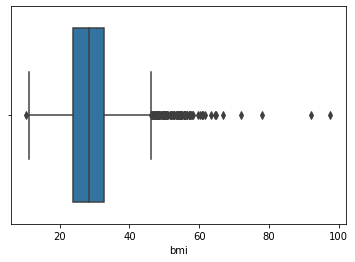

In [1427]:
#Managing outliers
for num_col in df_clean.select_dtypes(np.number).columns:
    print(num_col)
    sns.distplot(x= df_clean[num_col])
    plt.show()

for num_col in df_clean.select_dtypes(np.number).columns:
    print(num_col)
    sns.boxplot (x = df_clean[num_col])
    plt.show()

In [1428]:
df_clean.describe()

,age,avg_glucose_level,bmi
count,5109.000000,5109.000000,5109.000000
mean,43.218634,106.140399,28.894508
std,22.634799,45.285004,7.698235
min,0.000000,55.120000,10.300000
25%,25.000000,77.240000,23.800000
50%,45.000000,91.880000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


In [1429]:
#Age does not have any outliers
#Will manage outliers for avg glucose level and BMI.

def find_outliers_IQR(df_clean):
    q1=df_clean.quantile(0.25)
    q3=df_clean.quantile(0.75)
    IQR=q3-q1
    outliers = df_clean[((df_clean<(q1-1.5*IQR)) | (df_clean>(q3+1.5*IQR)))]
    return outliers

outliers = find_outliers_IQR(df_clean['age'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))


number of outliers: 0
max outlier value: nan
min outlier value: nan


In [1430]:
outliers = find_outliers_IQR(df_clean['avg_glucose_level'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))


number of outliers: 627
max outlier value: 271.74
min outlier value: 169.43


In [1431]:
outliers = find_outliers_IQR(df_clean['bmi'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))


number of outliers: 126
max outlier value: 97.6
min outlier value: 10.3


In [1432]:
#The dataset is not very large so I will not be removing outliers. 
#Instead I will be using multiple transformations to normalize the dataset.

x = ['avg_glucose_level','bmi']

def power_transf(x):
    return np.sqrt(x)

def log_transf(x):
    return np.log(x+1)

def boxcox_transf(x):
    return pd.Series(stats.boxcox(x+1)[0])




avg_glucose_level


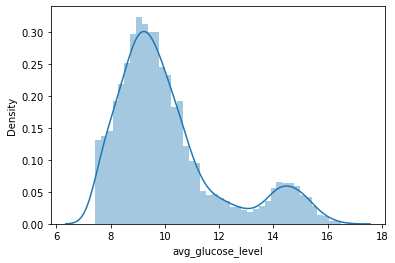

bmi


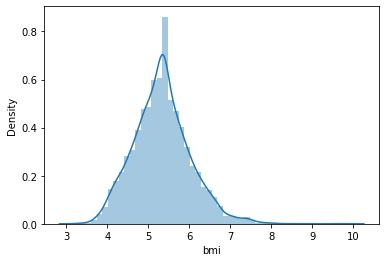

avg_glucose_level


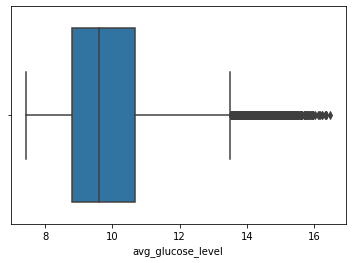

bmi


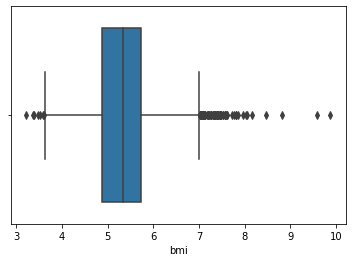

In [1433]:
for col in df_clean[x]:
    print(col)
    sns.distplot(power_transf(df_clean[col]))
    plt.show()
for col in df_clean[x]:
    print(col)
    sns.boxplot (power_transf(df_clean[col]))
    plt.show()

avg_glucose_level


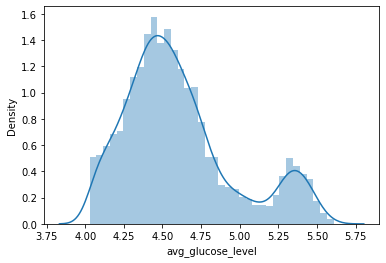

bmi


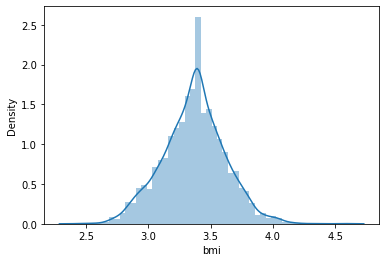

avg_glucose_level


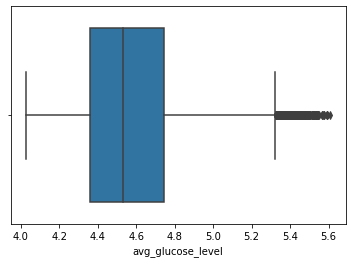

bmi


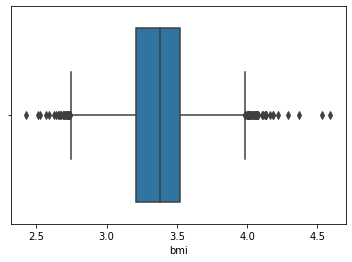

In [1434]:
for col in df_clean[x]:
    print(col)
    sns.distplot(log_transf(df_clean[col]))
    plt.show()
    
for col in df_clean[x]:
    print(col)
    sns.boxplot (log_transf(df_clean[col]))
    plt.show()

avg_glucose_level


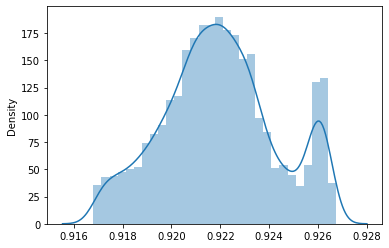

bmi


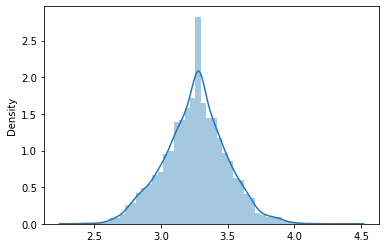

avg_glucose_level


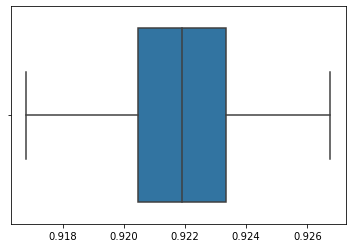

bmi


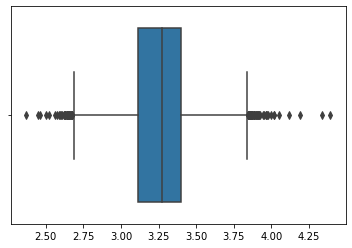

In [1435]:
for col in df_clean[x]:
    print(col)
    sns.distplot(boxcox_transf(df_clean[col]))
    plt.show()
    
for col in df_clean[x]:
    print(col)
    sns.boxplot (boxcox_transf(df_clean[col]))
    plt.show()

In [1436]:
#Box-cox transformation worked best. Added a column with new box-cox transformations.
#With this transformation, I am left with only 88 outliers in the BMI column.
for col in cols:
    print(col)
    new_col_name = f'{col}_BoxCox'
    df_clean[new_col_name] = boxcox_transf(df_clean[col])

avg_glucose_level
bmi


In [1437]:
df_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_BoxCox,bmi_BoxCox
0,Male,67,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,Yes,0.926296,3.501538
1,Female,61,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Yes,0.925920,3.287371
2,Male,80,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,Yes,0.922886,3.393853
3,Female,49,No,No,Yes,Private,Urban,171.23,34.400000,smokes,Yes,0.925326,3.445335
4,Female,79,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Yes,0.925391,3.119797


In [1438]:
outliers = find_outliers_IQR(df_clean['bmi'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

number of outliers: 126
max outlier value: 97.6
min outlier value: 10.3


In [1439]:
outliers = find_outliers_IQR(df_clean['bmi_BoxCox'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

number of outliers: 88
max outlier value: 4.39128307356539
min outlier value: 2.368289656625583


In [1440]:
outliers = find_outliers_IQR(df_clean['avg_glucose_level'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

number of outliers: 627
max outlier value: 271.74
min outlier value: 169.43


In [1441]:
outliers = find_outliers_IQR(df_clean['avg_glucose_level_BoxCox'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


<AxesSubplot:>

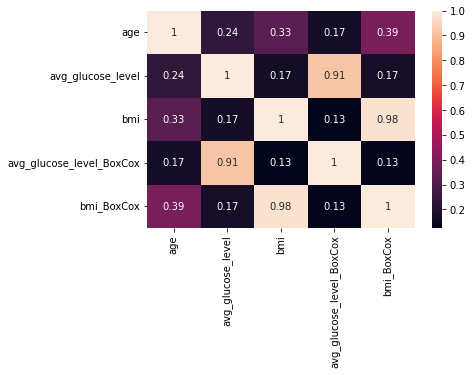

In [1442]:
#The transformed columns are obviously highly correlated to the original column.

numericals = df_clean.select_dtypes(np.number)
sns.heatmap(numericals.corr(), annot=True)

In [1443]:
numericals = numericals.drop(['bmi', 'avg_glucose_level'], axis=1)
numericals.head()

,age,avg_glucose_level_BoxCox,bmi_BoxCox
0,67,0.926296,3.501538
1,61,0.925920,3.287371
2,80,0.922886,3.393853
3,49,0.925326,3.445335
4,79,0.925391,3.119797


In [1444]:
#The transformed columns are highly inflated, i will not drop them as i do not want to lose too much data.
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(numericals.shape[1]):
    vif = variance_inflation_factor(np.array(numericals), i)
    print("Vif for column", numericals.columns[i], "= ", vif)

Vif for column age =  5.48552233123652
Vif for column avg_glucose_level_BoxCox =  209.86659652078757
Vif for column bmi_BoxCox =  230.1953805755407


In [1445]:
df_clean.to_csv('/Users/sarahrestrepo/Desktop/Final_Project/data_cleaning_stroke_drop.csv')